In [41]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd

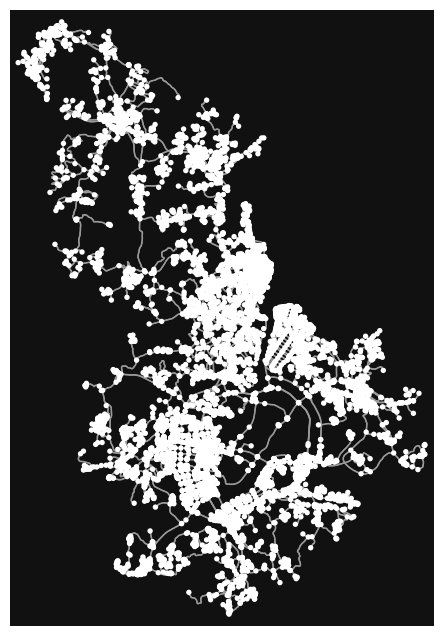

In [83]:
G = ox.graph_from_place("Sejong, Korea", network_type = "drive")
fig, ax = ox.plot_graph(G)

# Routing

In [99]:
# impute missing edge speed and calculate edge travel times
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)

In [87]:
# 데이터 읽기
orig = gpd.read_file("data/1000centroid_df.gpkg").to_crs(4326)
dest = pd.read_csv("data/selected_doctor.csv")
dest = gpd.GeoDataFrame(dest, geometry = gpd.points_from_xy(dest['좌표(X)'], dest['좌표(Y)']), crs = 4326)
dest = dest[dest['시군구코드명'] == '세종시']

In [146]:
# 출발지 좌표값별 가까운 출발지 노드 리스트 작성
orig_x = list(orig['geometry'].x)
orig_y = list(orig['geometry'].y)
orig_nodes = ox.distance.nearest_nodes(G, X=orig_x, Y=orig_y) # 출발점

# 도착지 좌표값별 가까운 도착지 노드 리스트 작성
dest_x = list(dest['geometry'].x)
dest_y = list(dest['geometry'].y)
dest_nodes = ox.distance.nearest_nodes(G, X=dest_x, Y=dest_y) # 출발점


In [13]:
# 출발점, 도착점 좌표 입력: 리스트가 아닌 개별로 입력할 경우 사용
orig = ox.distance.nearest_nodes(G, X=127.34920, Y=36.52611) # 출발점
dest = ox.distance.nearest_nodes(G, X=127.28971, Y=36.47725) # 도착점

In [ ]:
# find the shortest path between nodes, minimizing travel time
# 경로 분석 시 같은 인덱스의 출발지, 도착지의 대응 쌍만 고려: 출발지 노드, 도착지 노드를 출발지 노드 수 * 도착지 노드 수의 에지리스트로 만들어야 함
route = ox.routing.shortest_path(G, orig_nodes[0:25], dest_nodes[0:25], weight="travel_time", cpus = None)

In [ ]:
# plot the path
fig, ax = ox.plot_graph_route(G, route[0], node_size=0)

In [170]:
route_time = sum(ox.routing.route_to_gdf(G, route[0], weight="travel_time")["travel_time"]) # 초(sec) 단위 시간
route_time

515.3

In [ ]:
ox.routing.route_to_gdf(G, route[25], weight="travel_time")

In [141]:
len(dest_nodes)

26